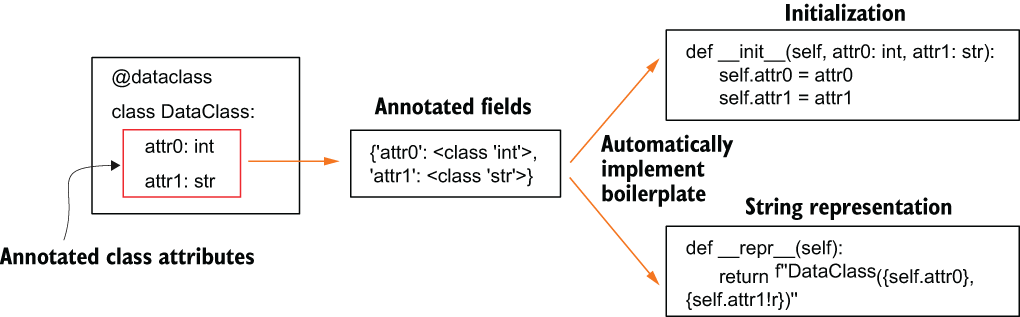

# dataclasses module

The dataclasses module (introduced in Python 3.7) provides a declarative and boilerplate-free approach for defining classes whose primary responsibility is storing data. It automatically generates commonly required methods such as __init__, __repr__, __eq__, and others based on class attributes.

This module is particularly valuable in data engineering, ETL pipelines, configuration models, and DTOs (Data Transfer Objects)—all of which align with your current Python and data-engineering focus.

### Core Concept

Instead of manually writing repetitive methods, you annotate attributes and decorate the class with @dataclass.

**Without dataclasses**

In [1]:
class User:
    def __init__(self, name: str, age: int):
        self.name = name
        self.age = age

    def __repr__(self):
        return f"User(name={self.name}, age={self.age})"

    def __eq__(self, other):
        if not isinstance(other, User):
            return NotImplemented
        return self.name == other.name and self.age == other.age


user1 = User("Alice", 30)
user1

User(name=Alice, age=30)

In [2]:
import dataclasses

In [4]:

@dataclasses.dataclass
class Users:
    name: str
    age: int


user2 = Users("Bob", 25)
user2

Users(name='Bob', age=25)

**By default, @dataclass generates:**


| Method      | Purpose                         |
| ----------- | ------------------------------- |
| `__init__`  | Constructor                     |
| `__repr__`  | Debug-friendly string           |
| `__eq__`    | Value-based equality            |
| `__hash__`  | Optional, depends on mutability |
| `__order__` | Optional ordering methods       |

In [5]:
@dataclasses.dataclass(
    init=True,
    repr=True,
    eq=True,
    order=False,
    frozen=False
)
class Example:
    x: int

| Parameter | Meaning                 |
| --------- | ----------------------- |
| `init`    | Generate `__init__`     |
| `repr`    | Generate `__repr__`     |
| `eq`      | Generate `__eq__`       |
| `order`   | Enable `<`, `<=`, `>`   |
| `frozen`  | Make instance immutable |

In [66]:
from dataclasses import field, fields


@dataclasses.dataclass()
class User:
    name: str = "shravan"
    age: int = field(default=30, repr=True, metadata={"info": "age of the user"}, hash=True)
    active: bool = field(default=1, repr=True, init=False)
    ranks: list = field(default_factory=list, compare=False)


user = User()
user

User(name='shravan', age=30, active=1, ranks=[])

In [70]:
[f.metadata.get("info") for f in fields(user)]

[None, 'age of the user', None, None]

In [71]:
fields(User)

(Field(name='name',type=<class 'str'>,default='shravan',default_factory=<dataclasses._MISSING_TYPE object at 0x0000022ACF259A90>,init=True,repr=True,hash=None,compare=True,metadata=mappingproxy({}),kw_only=False,doc=None,_field_type=_FIELD),
 Field(name='age',type=<class 'int'>,default=30,default_factory=<dataclasses._MISSING_TYPE object at 0x0000022ACF259A90>,init=True,repr=True,hash=True,compare=True,metadata=mappingproxy({'info': 'age of the user'}),kw_only=False,doc=None,_field_type=_FIELD),
 Field(name='active',type=<class 'bool'>,default=1,default_factory=<dataclasses._MISSING_TYPE object at 0x0000022ACF259A90>,init=False,repr=True,hash=None,compare=True,metadata=mappingproxy({}),kw_only=False,doc=None,_field_type=_FIELD),
 Field(name='ranks',type=<class 'list'>,default=<dataclasses._MISSING_TYPE object at 0x0000022ACF259A90>,default_factory=<class 'list'>,init=True,repr=True,hash=None,compare=False,metadata=mappingproxy({}),kw_only=False,doc=None,_field_type=_FIELD))

In [76]:
fields(user) is fields(User), fields(user) == fields(User)

(False, True)

In [90]:
from dataclasses import field, asdict, astuple


@dataclasses.dataclass()
class User:
    name: str
    age: int = field(default=30, repr=True, metadata={"info": "age of the user"}, hash=True)
    active: bool = field(default=1, repr=True, init=False)
    ranks: list = field(default_factory=list, compare=False)

    def __post_init__(self):
        self.name = self.name.upper()
        self.ranks.extend([1, 2, 3])


user = User("shravan")
user

User(name='SHRAVAN', age=30, active=1, ranks=[1, 2, 3])

In [92]:
asdict(user)

{'name': 'SHRAVAN', 'age': 30, 'active': 1, 'ranks': [1, 2, 3]}

In [93]:
astuple(user)

('SHRAVAN', 30, 1, [1, 2, 3])

In [95]:
from dataclasses import replace


@dataclasses.dataclass(frozen=True)
class NotaUser:
    id: int
    name: str


nuser1 = NotaUser(1, "shravan")
nuser1

NotaUser(id=1, name='shravan')

In [96]:
nuser2 = replace(nuser1, name="new_name")
nuser2

NotaUser(id=1, name='new_name')

| Feature     | `dataclass`     | `namedtuple`       | `pydantic`              |
| ----------- | --------------- | ------------------ | ----------------------- |
| Mutability  | Yes / Optional  | No                 | Yes                     |
| Type hints  | Yes             | Limited            | Yes                     |
| Validation  | No              | No                 | Yes                     |
| Performance | High            | Very high          | Moderate                |
| Use case    | Internal models | Lightweight tuples | API / schema validation |

In [97]:
from dataclasses import make_dataclass

users = make_dataclass("Users",
                       [("name", str), ("age", int, field(default=30))])
user = users("shravan")
user

Users(name='shravan', age=30)

In [109]:
from dataclasses import InitVar


@dataclasses.dataclass
class Users:
    name: str
    age: InitVar[int]

    def __post_init__(self, age):
        self.age = age + 5


user = Users("shravan", 25)
user.age  # initVar is overwritten to normal attribute in post_init

30